## Assignment: Using k-means clustering

### Introduction

The k-means clustering method is widely used in data science because of its simplicity and interpretability. In this assignment, we will explore k-means clustering and evaluate its performance using various metrics.

Understanding k-means clustering
K-means clustering is an unsupervised machine learning algorithm used to group similar data points together. It aims to partition the data into k distinct clusters, where each data point belongs to the cluster with the nearest mean (cluster center). The algorithm iteratively assigns data points to the nearest cluster and updates the cluster centers based on the mean of the assigned points.

### Dataset

The "Digits" dataset is a commonly used dataset in machine learning and computer vision. It is provided by scikit-learn, a popular machine learning library in Python. The dataset consists of 8x8 pixel images of handwritten digits from 0 to 9. Each image is represented as a feature vector of length 64, where each element represents the grayscale intensity of a pixel.

Here are some key details about the dataset:

- Number of samples: The dataset contains a total of 1,797 samples.
- Number of classes: There are 10 classes in the dataset, corresponding to the digits 0 to 9.
- Balanced classes: The dataset has a balanced distribution of samples across the classes, meaning each digit has a similar number of samples.
- Feature matrix: The feature matrix X is a 2-dimensional array of shape (1797, 64), where each row represents an image and each column represents a pixel intensity value.
- Target vector: The target vector y is a 1-dimensional array of length 1797, containing the corresponding digit labels for each image.




## Metrics for evaluating clustering performance

To assess the quality of clustering results, we can use several metrics. In this assignment, we will focus on three common metrics:

1. **Within-cluster sum-of-squares (WCSS):** WCSS measures the sum of the squared distances between each data point and its corresponding cluster center. It represents the compactness of the clusters, where a lower value indicates better clustering. We can use an "elbow" plot to determine the optimal number of clusters based on the WCSS value.

2. **Silhouette score:** The silhouette score measures how well each data point fits into its assigned cluster compared to other clusters. It calculates the average distance between a data point and all other points within its cluster (a) and the average distance between the data point and all points in the nearest neighboring cluster (b). The silhouette score ranges from -1 to 1, where a higher value indicates better clustering. A score close to 1 indicates that the data point is well-clustered, while a score close to -1 suggests that the data point may have been assigned to the wrong cluster.

3. **Calinski-Harabasz score:** The Calinski-Harabasz score is another metric used to evaluate clustering quality. It measures the ratio between the between-cluster dispersion and within-cluster dispersion. A higher Calinski-Harabasz score indicates better-defined and more separated clusters. This score can be useful for comparing different clustering methods on the same dataset.

## Steps:

1. Load the dataset.
2. Prepare the data.
3. Perform k-means clustering and evaluate metrics.
4. Visualize the metrics.
5. Determine the optimal value of k.
6. Use the optimal k for clustering and test accuracy with test data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

1. Load the dataset:

    - Use the `load_digits()` function from the `sklearn.datasets` module to load the dataset.
    - The dataset will be stored in the variable `digits`.

In [3]:
# Step 1: Load the dataset
digits = load_digits()
X = digits.data

2. Prepare the data:

    - Extract the feature matrix `X` from the dataset.
    - Since clustering algorithms are based on distances, we need to scale the data. Use the `StandardScaler()` from `sklearn.preprocessing` to standardize the feature matrix `X`.
    - The standardized data will be stored in the variable `scaled_X`.

[ADD COMMENT] Explain the use of StandardScaler()]

***I scale with StandardScaler so each pixel is comparable in k-means***

In [6]:
# Step 2: Prepare the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

3. Perform k-means clustering and evaluate metrics:

    - We will evaluate the clustering performance for different values of k.
    - Initialize an empty list `wcss` to store the within-cluster sum-of-squares (WCSS) values.
    - Initialize empty lists `silhouette_scores` and `calinski_scores` to store the silhouette scores and Calinski-Harabasz scores, respectively.
    - Iterate over a range of k values (e.g., 2 to 10):
        - Create a `KMeans` instance with the current value of k.
        - Fit the k-means model to the scaled data `scaled_X`.
        - Calculate the WCSS using the `inertia_` attribute of the k-means model and store it in the `wcss` list.
        - Calculate the silhouette score using the `silhouette_score` function from `sklearn.metrics` and store it in the `silhouette_scores` list.
        - Calculate the Calinski-Harabasz score using the `calinski_harabasz_score` function from `sklearn.metrics` and store it in the `calinski_scores` list.
    - Print the values of WCSS, silhouette score, and Calinski score for each value of k.

    [ADD COMMENT - "What are the metrics used to evaluate the performance of k-means clustering, and how are they calculated in this code? Explain the results."]

   ***The metrics used to evaluate performance of k-means clustering are WCSS, silhouette, and Calinski-Harabasz. They are calculated directly from the fitted KMeans***

In [22]:
# Step 3: Perform k-means clustering and evaluate metrics
k_values = range(2, 11)
wcss = []
silhouette_scores = []
calinski_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    labels = kmeans.labels_
    
    # Calculate WCSS
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(scaled_X, labels))
    
    # Calculate Calinski-Harabasz score
    calinski_scores.append(calinski_harabasz_score(scaled_X, labels))

4. Visualize the metrics:

    - Plot a line graph of the WCSS values against the number of clusters (k).
    - Plot a line graph of the silhouette scores against the number of clusters (k).
    - Plot a line graph of the Calinski-Harabasz scores against the number of clusters (k).
    - Label the axes and provide a title for each plot.
    - Display the plots.

    [ADD COMMENT] - Can you explain the purpose of plotting the WCSS values, silhouette scores, and Calinski-Harabasz scores against the number of clusters (k) in this code? How can these plots help in evaluating the performance of the k-means clustering algorithm?

   ***The purpose of plotting the WCSS values, silhouette scores, and Calinski-Harabasz scores against the number of clusters (k) helps to find elbow/peaks for the best number of clusters. These plots can help train final k-means and predict labels to see which cluster the algorithm assigns to them***

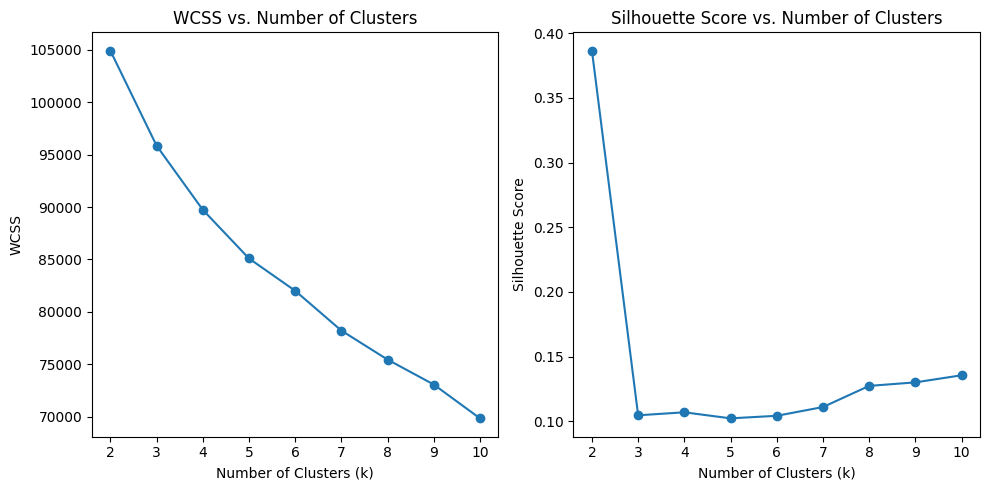

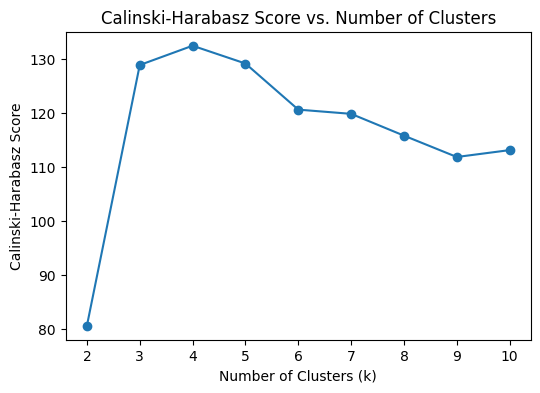

In [25]:

# Step 4: Visualize the metrics
plt.figure(figsize=(10, 5))

# Plot WCSS
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters')

# Plot Silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.tight_layout()
plt.show()

# Plot Calinski-Harabasz score
plt.figure(figsize=(6, 4))
plt.plot(k_values, calinski_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.show()

 5. Determine the optimal value of k:

    - Identify the optimal value of k based on the silhouette score, calinski scores and wcss.
    - Find the index of the maximum silhouette score using the `np.argmax` function and the `silhouette_scores` list.
    - The optimal value of k will be the corresponding value from the `k_values` list.
    - Print the optimal value of k based each metric. .

In [28]:
# Step 5: Determine the optimal value of k for each metric
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal value of k based on silhouette score: {optimal_k}")

optimal_k = k_values[np.argmin(calinski_scores)]
print(f"The optimal value of k based on calinski score: {optimal_k}")

optimal_k = k_values[np.argmin(wcss)]
print(f"The optimal value of k based on wcss: {optimal_k}")


The optimal value of k based on silhouette score: 2
The optimal value of k based on calinski score: 2
The optimal value of k based on wcss: 10


6. Use the optimal k for clustering and test accuracy with test data:

    - Create a new `KMeans` instance using the optimal value of k.
    - Fit the k-means model to the scaled data `scaled_X`.
    - Generate some test data (e.g., using `np.random.rand`) and scale it using the same scaler.
    - Predict the cluster labels for the scaled test data using the optimal k-means model.
    - Print the cluster labels for the test data.


In [31]:
# Step 6: Use the optimal k for clustering and test accuracy with test data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_X)


KMeans(n_clusters=10, random_state=42)

### ADD COMMENT
- What is the purpose of the test_data variable in this code, and how is it generated?

***The purpose of the test_data is to provide new, unseen digit examples, so we can check which cluster the k-means model assigns them to. Test_data is generated by copying a single example of the digit ten times and then scaling it just like the original digits so it fits into the same space***

- What is the significance of predicting cluster labels for the test data, and how are the cluster labels determined?

***Predicting cluster labels tells which group each new sample belongs to, showing how the model handles unseen inputs. K-means does this by finding which cluster center is closest to each sample and assigns that cluster’s label.***

In [16]:
# Generate some test data representing the digit 3
test_data = np.zeros((10, 64))

# Define the pixel intensities for digit 3
digit_3 = [
    0, 0, 0, 12, 13, 0, 0, 0,
    0, 0, 0, 11, 16, 10, 0, 0,
    0, 0, 3, 15, 16, 2, 0, 0,
    0, 0, 8, 16, 16, 4, 0, 0,
    0, 0, 0, 5, 16, 7, 0, 0,
    0, 0, 0, 0, 14, 7, 0, 0,
    0, 0, 0, 0, 16, 7, 0, 0,
    0, 0, 0, 9, 15, 0, 0, 0
]

# Assign the pixel intensities for digit 3 to the test data
for i in range(10):
    test_data[i] = digit_3

# Scale the test data using the same scaler
scaled_test_data = scaler.transform(test_data)

print(test_data)

# Predict cluster labels for the test data
test_labels = kmeans.predict(scaled_test_data)
print(f"Cluster labels for test data: {test_labels}")

[[ 0.  0.  0. 12. 13.  0.  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.  0.  0.
   3. 15. 16.  2.  0.  0.  0.  0.  8. 16. 16.  4.  0.  0.  0.  0.  0.  5.
  16.  7.  0.  0.  0.  0.  0.  0. 14.  7.  0.  0.  0.  0.  0.  0. 16.  7.
   0.  0.  0.  0.  0.  9. 15.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  0.  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.  0.  0.
   3. 15. 16.  2.  0.  0.  0.  0.  8. 16. 16.  4.  0.  0.  0.  0.  0.  5.
  16.  7.  0.  0.  0.  0.  0.  0. 14.  7.  0.  0.  0.  0.  0.  0. 16.  7.
   0.  0.  0.  0.  0.  9. 15.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  0.  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.  0.  0.
   3. 15. 16.  2.  0.  0.  0.  0.  8. 16. 16.  4.  0.  0.  0.  0.  0.  5.
  16.  7.  0.  0.  0.  0.  0.  0. 14.  7.  0.  0.  0.  0.  0.  0. 16.  7.
   0.  0.  0.  0.  0.  9. 15.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  0.  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.  0.  0.
   3. 15. 16.  2.  0.  0.  0.  0.  8. 16. 16.  4.  0.  0.  0.  0.  0.  5.
  16.  7.  0.  0.  0.  0.  0.  0. 14.  7.  0.  0.  0.  0.